In [24]:
'''
******CIFAR-FS(cifar100) 共100类，每类600张，共60000张，像素32*32，训练集64，验证集16，测试集20
'''
import os
import sys
import cv2 as cv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
import torchvision.transforms as transforms
#CV2  4.1.2可以用绝对地址，新版本只能使用相对路径
data_dir = 'data/CIFAR-FS/cifar100'
dataset_train = "train.txt"
dataset_val = "val.txt"
dataset_test = "test.txt"
cls_train = 64
cls_val = 16
cls_test = 20


In [4]:
#测试用，下面直接写成函数readtxt()
fname = 'train.txt'
result = []
f = open(os.path.join(data_dir, 'splits/bertinetto', fname))
lines = f.readlines()
for line in lines:
    result.append(line)
    #print(line)
result = [line.strip("\n") for line in result]
print(result)

['train', 'skyscraper', 'turtle', 'raccoon', 'spider', 'orange', 'castle', 'keyboard', 'clock', 'pear', 'girl', 'seal', 'elephant', 'apple', 'aquarium_fish', 'bus', 'mushroom', 'possum', 'squirrel', 'chair', 'tank', 'plate', 'wolf', 'road', 'mouse', 'boy', 'shrew', 'couch', 'sunflower', 'tiger', 'caterpillar', 'lion', 'streetcar', 'lawn_mower', 'tulip', 'forest', 'dolphin', 'cockroach', 'bear', 'porcupine', 'bee', 'hamster', 'lobster', 'bowl', 'can', 'bottle', 'trout', 'snake', 'bridge', 'pine_tree', 'skunk', 'lizard', 'cup', 'kangaroo', 'oak_tree', 'dinosaur', 'rabbit', 'orchid', 'willow_tree', 'ray', 'palm_tree', 'mountain', 'house', 'cloud']


In [5]:
def readtxt(fname):
    result = []
    f = open(fname)
    lines = f.readlines()
    for line in lines:
        result.append(line)
    result = [line.strip("\n") for line in result]
    return result
    
fname = 'train.txt'
fname = os.path.join(data_dir, 'splits/bertinetto', fname)
print(fname)
filname_txt = readtxt(fname)
print(len(filname_txt))
print(filname_txt)

data/CIFAR-FS/cifar100/splits/bertinetto/train.txt
64
['train', 'skyscraper', 'turtle', 'raccoon', 'spider', 'orange', 'castle', 'keyboard', 'clock', 'pear', 'girl', 'seal', 'elephant', 'apple', 'aquarium_fish', 'bus', 'mushroom', 'possum', 'squirrel', 'chair', 'tank', 'plate', 'wolf', 'road', 'mouse', 'boy', 'shrew', 'couch', 'sunflower', 'tiger', 'caterpillar', 'lion', 'streetcar', 'lawn_mower', 'tulip', 'forest', 'dolphin', 'cockroach', 'bear', 'porcupine', 'bee', 'hamster', 'lobster', 'bowl', 'can', 'bottle', 'trout', 'snake', 'bridge', 'pine_tree', 'skunk', 'lizard', 'cup', 'kangaroo', 'oak_tree', 'dinosaur', 'rabbit', 'orchid', 'willow_tree', 'ray', 'palm_tree', 'mountain', 'house', 'cloud']


In [6]:
train_txt = readtxt(os.path.join(data_dir, 'splits/bertinetto', dataset_train))
val_txt = readtxt(os.path.join(data_dir, 'splits/bertinetto', dataset_val))
test_txt = readtxt(os.path.join(data_dir, 'splits/bertinetto', dataset_test))
print(len(train_txt))
print(len(val_txt))
print(len(test_txt))

64
16
20


In [7]:
#求类别，并合并label
labels_list = train_txt + val_txt + test_txt
print('数据集label总数：',len(labels_list))
print(labels_list)
print('train,val交集： ',set(train_txt) & set(val_txt))
print('train,test交集： ',set(train_txt) & set(test_txt))
print('val,test交集： ',set(val_txt) & set(test_txt))

数据集label总数： 100
['train', 'skyscraper', 'turtle', 'raccoon', 'spider', 'orange', 'castle', 'keyboard', 'clock', 'pear', 'girl', 'seal', 'elephant', 'apple', 'aquarium_fish', 'bus', 'mushroom', 'possum', 'squirrel', 'chair', 'tank', 'plate', 'wolf', 'road', 'mouse', 'boy', 'shrew', 'couch', 'sunflower', 'tiger', 'caterpillar', 'lion', 'streetcar', 'lawn_mower', 'tulip', 'forest', 'dolphin', 'cockroach', 'bear', 'porcupine', 'bee', 'hamster', 'lobster', 'bowl', 'can', 'bottle', 'trout', 'snake', 'bridge', 'pine_tree', 'skunk', 'lizard', 'cup', 'kangaroo', 'oak_tree', 'dinosaur', 'rabbit', 'orchid', 'willow_tree', 'ray', 'palm_tree', 'mountain', 'house', 'cloud', 'otter', 'motorcycle', 'television', 'lamp', 'crocodile', 'shark', 'butterfly', 'beaver', 'beetle', 'tractor', 'flatfish', 'maple_tree', 'camel', 'crab', 'sea', 'cattle', 'baby', 'bed', 'bicycle', 'chimpanzee', 'fox', 'leopard', 'man', 'pickup_truck', 'plain', 'poppy', 'rocket', 'rose', 'snail', 'sweet_pepper', 'table', 'telephon

In [8]:
#将类别转化为数字标号
labels_dict = {}
i = 1
for l in labels_list:
    if l not in labels_dict:
        labels_dict[l] = i
        i = i+1
print(labels_dict)

{'train': 1, 'skyscraper': 2, 'turtle': 3, 'raccoon': 4, 'spider': 5, 'orange': 6, 'castle': 7, 'keyboard': 8, 'clock': 9, 'pear': 10, 'girl': 11, 'seal': 12, 'elephant': 13, 'apple': 14, 'aquarium_fish': 15, 'bus': 16, 'mushroom': 17, 'possum': 18, 'squirrel': 19, 'chair': 20, 'tank': 21, 'plate': 22, 'wolf': 23, 'road': 24, 'mouse': 25, 'boy': 26, 'shrew': 27, 'couch': 28, 'sunflower': 29, 'tiger': 30, 'caterpillar': 31, 'lion': 32, 'streetcar': 33, 'lawn_mower': 34, 'tulip': 35, 'forest': 36, 'dolphin': 37, 'cockroach': 38, 'bear': 39, 'porcupine': 40, 'bee': 41, 'hamster': 42, 'lobster': 43, 'bowl': 44, 'can': 45, 'bottle': 46, 'trout': 47, 'snake': 48, 'bridge': 49, 'pine_tree': 50, 'skunk': 51, 'lizard': 52, 'cup': 53, 'kangaroo': 54, 'oak_tree': 55, 'dinosaur': 56, 'rabbit': 57, 'orchid': 58, 'willow_tree': 59, 'ray': 60, 'palm_tree': 61, 'mountain': 62, 'house': 63, 'cloud': 64, 'otter': 65, 'motorcycle': 66, 'television': 67, 'lamp': 68, 'crocodile': 69, 'shark': 70, 'butterfl

In [9]:
#测试读取 图片文件
filepath = os.path.join(data_dir, 'data', train_txt[0])
images = []
for image_item in os.listdir(filepath):
    images.append(image_item)
print(len(images))
print(images[0])
fall_path = os.path.join(filepath, images[0])
#image = cv.imread(fall_path)#读取图片
image = Image.open(fall_path)
image.show()

600
boat_train_s_000018.png


In [20]:
"""
读取图像文件，存入list中
下面直接封装成  get_image(path,_data)函数
"""
images = []
labels = []
i = 0
with tqdm(total=cls_test*600) as pbar:
    pbar.set_description('Processing:')
    for fname in test_txt:
        filepath = os.path.join(data_dir, 'data', fname)
        for image_item in os.listdir(filepath):
            fall_path = os.path.join(filepath, image_item)
            image = cv.imread(fall_path)#读取图片
            images.append(image)
            labels.append(labels_dict[fname])
            pbar.update(1)#更新进度条
            i+=1
            if i==1:
                img0=Image.open(fall_path)
                img0.show()
                #print(fname+': '+str(labels_dict[fname]))

print(len(images))
print(set(test_txt))

Processing:: 100%|██████████| 12000/12000 [00:04<00:00, 2983.45it/s]

12000
{'wardrobe', 'baby', 'sweet_pepper', 'snail', 'telephone', 'pickup_truck', 'chimpanzee', 'worm', 'rose', 'woman', 'man', 'leopard', 'fox', 'rocket', 'bicycle', 'bed', 'poppy', 'plain', 'whale', 'table'}


In [21]:
print(images[0].shape,labels[0])
#cv.imshow("image label: %s" %labels[0],images[0])

#cv.waitKey(0)

(32, 32, 3) 81


In [12]:
#对应图像小于crop高宽的,筛选出来
def filter(imgs,crop_size):
    return [img for img in imgs if (
        img.shape[0] < crop_size[0] or img.shape[1] < crop_size[1])]

In [22]:
small_image = filter(images,[32,32])
print('小图片数量：',len(small_image))
if len(small_image) > 0:
    print(small_image[1].shape)
    Image.fromarray(small_image[1]).show()
    Image.fromarray(cv.resize(small_image[1],(84,84))).show()

小图片数量： 0


In [14]:
"""
读取图像文件，存入list中
"""
def get_image(label_data,cls_data):
    images = []
    labels = []
    crop_size = [32,32]
    with tqdm(total=cls_data*600) as pbar:
        pbar.set_description('Processing:')
        for fname in label_data:
            filepath = os.path.join(data_dir, 'data', fname)
            for image_item in os.listdir(filepath):
                fall_path = os.path.join(filepath, image_item)
                image = cv.imread(fall_path)#读取图片
                image = cv.resize(image,(32,32))#resize成（84，84）
                images.append(image)
                labels.append(labels_dict[fname])
                pbar.update(1)#更新进度条
    return images, labels

In [31]:
"""
写入.pickle文件
"""
#images, labels = get_image(train_txt,cls_train)#替换上面读取的txt数据
images, labels = get_image(val_txt,cls_val)
#images, labels = get_image(test_txt,cls_test)
images = np.asarray(images,dtype=object)
print(images.shape)
small_image = filter(images,[32,32])
print('小图片数量：',len(small_image))
image_dic = {'data': images, 'labels' : labels}
#train.txt  CIFAR-FS_category_split_train_phase_train.pickle
#val.txt  CIFAR-FS_category_split_train_phase_val.pickle
#test.txt  CIFAR-FS_category_split_test.pickle
with open('CIFAR-FS_category_split_train_phase_val.pickle', 'wb') as f:
    pickle.dump(image_dic, f)
    f.close()

Processing:: 100%|██████████| 9600/9600 [01:01<00:00, 156.18it/s]


(9600, 32, 32, 3)
小图片数量： 0


In [32]:
"""
读取.pickle文件
"""
#path='CIFAR-FS_category_split_train_phase_train.pickle'
path='CIFAR-FS_category_split_train_phase_val.pickle'
#path='CIFAR-FS_category_split_test.pickle'
with open(path,'rb') as f:
    data = pickle.load(f, encoding='bytes')
    imgs = data['data']
    labels = data['labels']
print(len(imgs))
print(imgs[0].shape)

9600
(32, 32, 3)


[65, 65, 65, 65, 65, 65, 65, 65, 65, 65]


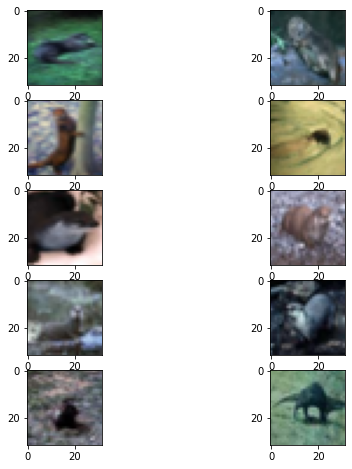

In [33]:
#测试生成的数据正确不
def test(image_dataset,image_label):
    print(image_label[:10])
    plt.figure(figsize=(8,8))
    for i in range(10):
        plt.subplot(5,2,i+1)
        plt.imshow(np.asarray(image_dataset[i]).astype('uint8'))
    plt.show()
    
test(imgs,labels)

In [34]:
item = 0
img = np.asarray(imgs[item]).astype('uint8')
img = Image.fromarray(img)
img.show()

In [35]:
slabels = np.asarray(labels)
print(slabels)
np.min(slabels)
slabels = slabels - np.min(slabels)
numclass = np.max(slabels)+1
print('number of class=',numclass)

[65 65 65 ... 80 80 80]
number of class= 16
